# Model fitting

In [1]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pylab as plt
import jetset
from jetset.test_data_helper import  test_SEDs
from jetset.data_loader import ObsData,Data
from jetset.plot_sedfit import PlotSED
from jetset.test_data_helper import  test_SEDs


In [2]:
test_SEDs

['/Users/orion/anaconda3/envs/jetset/lib/python3.7/site-packages/jetset-1.1.2-py3.7-macosx-10.9-x86_64.egg/jetset/test_data/SEDs_data/SED_3C345.ecsv',
 '/Users/orion/anaconda3/envs/jetset/lib/python3.7/site-packages/jetset-1.1.2-py3.7-macosx-10.9-x86_64.egg/jetset/test_data/SEDs_data/SED_MW_Mrk421_EBL_DEABS.ecsv',
 '/Users/orion/anaconda3/envs/jetset/lib/python3.7/site-packages/jetset-1.1.2-py3.7-macosx-10.9-x86_64.egg/jetset/test_data/SEDs_data/SED_MW_Mrk501_EBL_DEABS.ecsv']

## loading data



In [3]:
print(test_SEDs[1])
data=Data.from_file(test_SEDs[1])


/Users/orion/anaconda3/envs/jetset/lib/python3.7/site-packages/jetset-1.1.2-py3.7-macosx-10.9-x86_64.egg/jetset/test_data/SEDs_data/SED_MW_Mrk421_EBL_DEABS.ecsv



***  binning data  ***
---> N bins= 89
---> bin_widht= 0.2



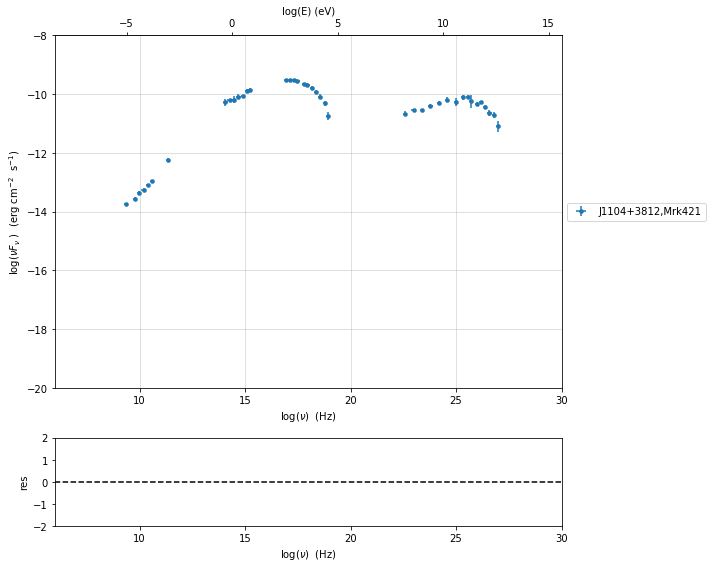

In [4]:
%matplotlib inline
sed_data=ObsData(data_table=data)
sed_data.group_data(bin_width=0.2)

sed_data.add_systematics(0.1,[10.**6,10.**29])
p=sed_data.plot_sed()

## phenomenological model constraining

### spectral indices


*** evaluating spectral indices for data ***
---> initial range for index radio  set to [6.000000,10.000000]
---> range for index radio updated  to [6.000000,10.000000]
---> name = radio            range=[6.000 ,10.000] log(Hz)  photon.val=-1.426527e+00, err=1.242337e-01 

---> initial range for index radio_mm  set to [10.000000,11.000000]
---> range for index radio_mm updated  to [10.000000,11.000000]
---> name = radio_mm         range=[10.000,11.000] log(Hz)  photon.val=-1.290348e+00, err=3.549107e-02 

---> initial range for index mm_IR  set to [11.000000,13.000000]
---> range for index mm_IR updated  to [10.300000,13.700000]
---> name = mm_IR            range=[10.300,13.700] log(Hz)  photon.val=-1.113008e+00, err=5.915489e-02 

---> initial range for index IR_Opt  set to [13.000000,14.000000]
---> range for index IR_Opt updated  to [12.500000,14.500000]
---> name = IR_Opt           range=[12.500,14.500] log(Hz)  photon.val=-1.783218e+00, err=9.834839e-02 

---> initial range for i

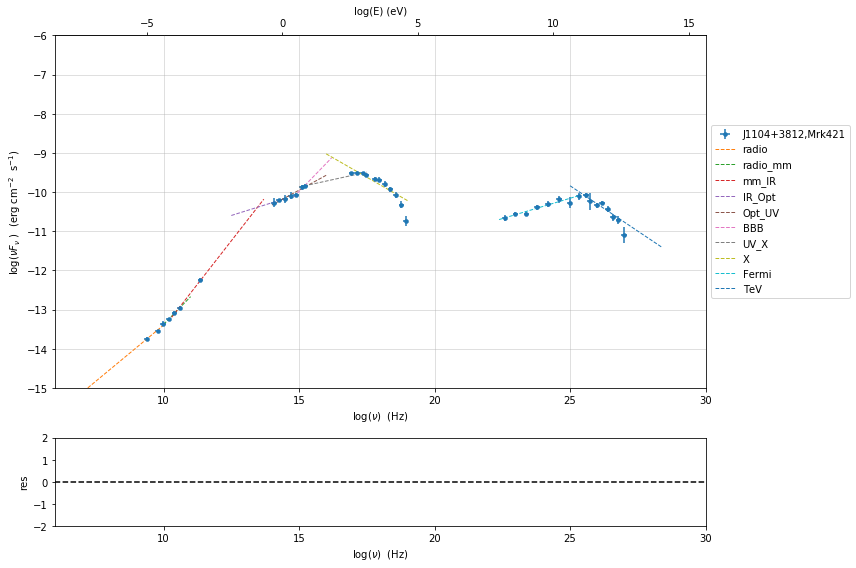

In [5]:
from jetset.sed_shaper import  SEDShape
my_shape=SEDShape(sed_data)
my_shape.eval_indices(silent=True)
p=my_shape.plot_indices()
p.rescale(y_min=-15,y_max=-6)

### sed shaper

In [6]:
mm,best_fit=my_shape.sync_fit(check_host_gal_template=False,
                  Ep_start=None,
                  minimizer='lsb',
                  silent=True,
                  fit_range=[10., 21.])


*** Log-Polynomial fitting of the synchrotron component ***
---> first blind fit run,  fit range: [10, 21]
---> class:  HSP



model name name  bestfit val     err +     err -   start val   fit range min fit range max frozen
---------- ---- ------------- ------------ ----- ------------- ------------- ------------- ------
  LogCubic    b -1.545301e-01 9.534755e-03    -- -1.000000e+00 -1.000000e+01  0.000000e+00  False
  LogCubic    c -1.023245e-02 1.433057e-03    -- -1.000000e+00 -1.000000e+01  1.000000e+01  False
  LogCubic   Ep  1.672267e+01 4.139905e-02    --  1.667039e+01  0.000000e+00  3.000000e+01  False
  LogCubic   Sp -9.491658e+00 2.515289e-02    -- -1.000000e+01 -3.000000e+01  0.000000e+00  False
---> sync       nu_p=+1.672267e+01 (err=+4.139905e-02)  nuFnu_p=-9.491658e+00 (err=+2.515289e-02) curv.=-1.545301e-01 (err=+9.534755e-03)




*** Log-Polynomial fitting of the IC component ***
---> fit range: [23, 29]
---> LogCubic fit

**************************************************************************************************
Fit report

Model: IC-shape-fit
model name name   par type       units          val      phys. bound. min phys. bound. max  log  frozen
---------- ---- ------------ ------------- ------------- ---------------- ---------------- ----- ------
  LogCubic    b    curvature               -2.097925e-01    -1.000000e+01     0.000000e+00 False  False
  LogCubic    c third-degree               -4.662648e-02    -1.000000e+01     1.000000e+01 False  False
  LogCubic   Ep    peak freq            Hz  2.524932e+01     0.000000e+00     3.000000e+01  True  False
  LogCubic   Sp    peak flux erg / (cm2 s) -1.011094e+01    -3.000000e+01     0.000000e+00  True  False

converged=True
calls=202
------------------------------------------------------------------
| FCN = 5.911                   |     Ncalls=201 (201 to

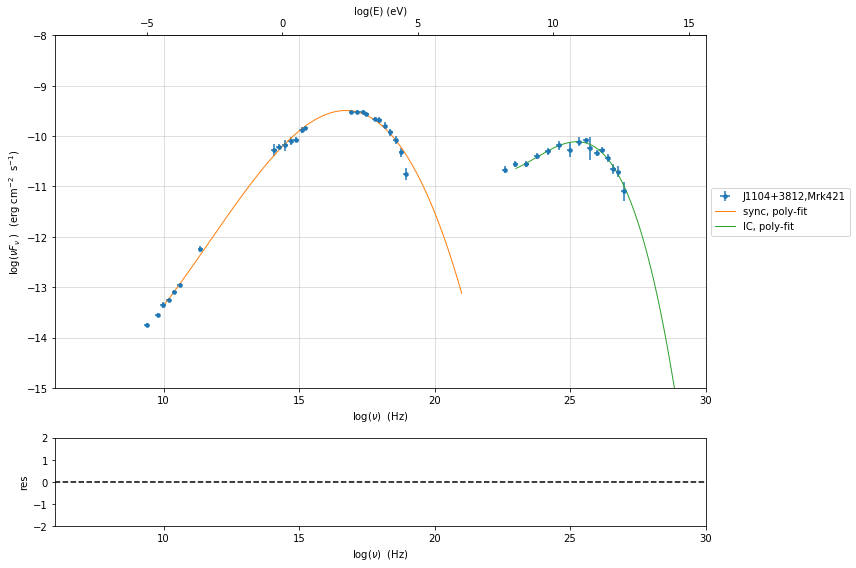

In [7]:
my_shape.IC_fit(fit_range=[23., 29.],minimizer='minuit')
p=my_shape.plot_shape_fit()
p.rescale(y_min=-15)

### model constraining

In [9]:
from jetset.obs_constrain import ObsConstrain
from jetset.model_manager import  FitModel
from jetset.minimizer import fit_SED
sed_obspar=ObsConstrain(beaming=25,
                        B_range=[0.001,0.1],
                        distr_e='lppl',
                        t_var_sec=3*86400,
                        nu_cut_IR=1E12,
                        SEDShape=my_shape)


prefit_jet=sed_obspar.constrain_SSC_model(electron_distribution_log_values=False)
prefit_jet.save_model('prefit_jet.pkl')


***  constrains parameters from observable ***

---> ***  emitting region parameters  ***
---> name = beam_obj          type = beaming               units = Lorentz-factor*   val = +2.500000e+01  phys-bounds = [+1.000000e-04,No           ] islog = False  froze= False 
---> setting par type redshift, corresponding to par z_cosm
--->  name = z_cosm            type = redshift              units =                   val = +3.080000e-02  phys-bounds = [+0.000000e+00,No           ] islog = False  froze= False 

---> setting par type magnetic_field, corresponding to par B
--->  name = B                 type = magnetic_field        units = G                 val = +5.050000e-02  phys-bounds = [+0.000000e+00,No           ] islog = False  froze= False 

---> setting par type region_size, corresponding to par R
--->  name = R                 type = region_size           units = cm                val = +1.884609e+17  phys-bounds = [+1.000000e+03,+1.000000e+30] islog = False  froze= False 


---> **

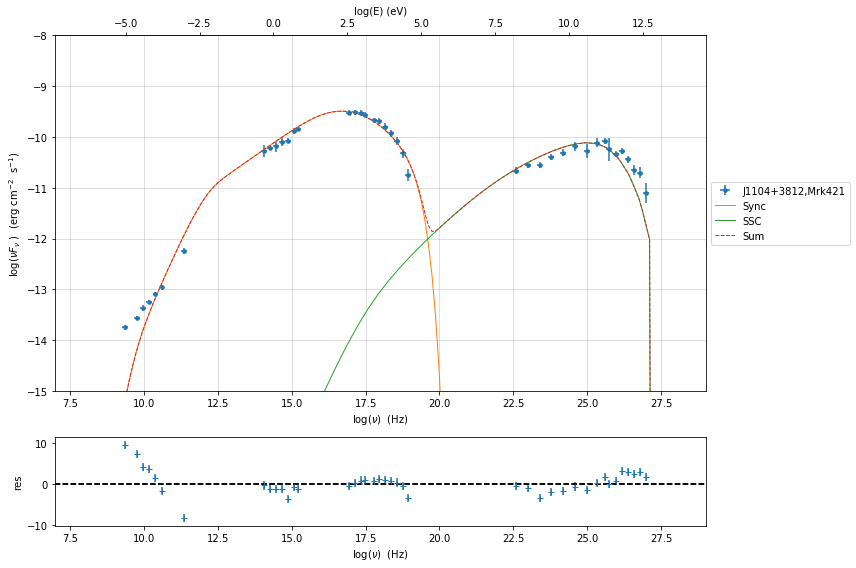

In [10]:
pl=prefit_jet.plot_model(sed_data=sed_data)
pl.add_residual_plot(prefit_jet,sed_data)
pl.rescale(y_min=-15,x_min=7,x_max=29)

## Model fitting only Synchorotron component

### Model fitting with Minuit

In [23]:
from jetset.jet_model import Jet
jet_minuit=Jet.load_model('prefit_jet.pkl')
jet_minuit.set_gamma_grid_size(200)

      name             par type           units          val      phys. bound. min phys. bound. max  log  frozen
---------------- ------------------- --------------- ------------ ---------------- ---------------- ----- ------
            gmin  low-energy-cut-off lorentz-factor* 3.338231e+02     1.000000e+00     1.000000e+09 False  False
            gmax high-energy-cut-off lorentz-factor* 9.758134e+05     1.000000e+00     1.000000e+15 False  False
               N    emitters_density         1 / cm3 3.072164e+00     0.000000e+00               -- False  False
               s   LE_spectral_slope                 2.181578e+00    -1.000000e+01     1.000000e+01 False  False
               r  spectral_curvature                 7.726503e-01    -1.500000e+01     1.500000e+01 False  False
gamma0_log_parab    turn-over-energy lorentz-factor* 2.265855e+04     1.000000e+00     1.000000e+09 False  False
               R         region_size              cm 1.649188e+16     1.000000e+03     1.000000e

we switch off the IC component

In [24]:

jet_minuit.spectral_components.SSC.state='off'
jet_minuit.show_model()


-------------------------------------------------------------------------------------------------------------------
jet model description
-------------------------------------------------------------------------------------------------------------------
name: jet_leptonic  

electrons distribution:
 type: lppl  
 gamma energy grid size:  201
 gmin grid : 3.338231e+02
 gmax grid : 9.758134e+05
 normalization  True
 log-values  False

radiative fields:
 seed photons grid size:  100
 IC emission grid size:  50
 source emissivity lower bound :  1.000000e-120
 spectral components:
   name:Sum, state: on
   name:Sync, state: self-abs
   name:SSC, state: off
external fields transformation method: blob

SED info:
 nu grid size :200
 nu mix (Hz): 1.000000e+06
 nu max (Hz): 1.000000e+30

flux plot lower bound   :  1.000000e-120

      name             par type           units          val      phys. bound. min phys. bound. max  log  frozen
---------------- ------------------- --------------- --

In [25]:
fit_model_minuit=FitModel( jet=jet_minuit, name='Only-Synch-best-fit-minuit') 

fit_model_minuit.freeze('jet_leptonic','z_cosm')
fit_model_minuit.freeze('jet_leptonic','R_H')
fit_model_minuit.freeze('jet_leptonic','R')
fit_model_minuit.freeze('jet_leptonic','gmax')
fit_model_minuit.jet_leptonic.parameters.R.fit_range=[10**15.5, 10**17.5]
fit_model_minuit.jet_leptonic.parameters.beam_obj.fit_range=[5., 50.]

In [26]:
from jetset.minimizer import fit_SED,ModelMinimizer

model_minimizer_minuit=ModelMinimizer('minuit')
best_fit_minuit=model_minimizer_minuit.fit(fit_model_minuit,sed_data,10.0**15,10**20.0,fitname='SSC-best-fit-minuit')

filtering data in fit range = [1.000000e+15,1.000000e+20]
data length 13

*** start fit process ***
----- 
\ minim function calls=640, chisq=848.656969 UL part=-0.000000
**************************************************************************************************
Fit report

Model: SSC-best-fit-minuit
 model name        name             par type           units          val      phys. bound. min phys. bound. max  log  frozen
------------ ---------------- ------------------- --------------- ------------ ---------------- ---------------- ----- ------
jet_leptonic             gmin  low-energy-cut-off lorentz-factor* 3.264273e+02     1.000000e+00     1.000000e+09 False  False
jet_leptonic             gmax high-energy-cut-off lorentz-factor* 9.758134e+05     1.000000e+00     1.000000e+15 False   True
jet_leptonic                N    emitters_density         1 / cm3 8.676833e+00     0.000000e+00               -- False  False
jet_leptonic                s   LE_spectral_slope             

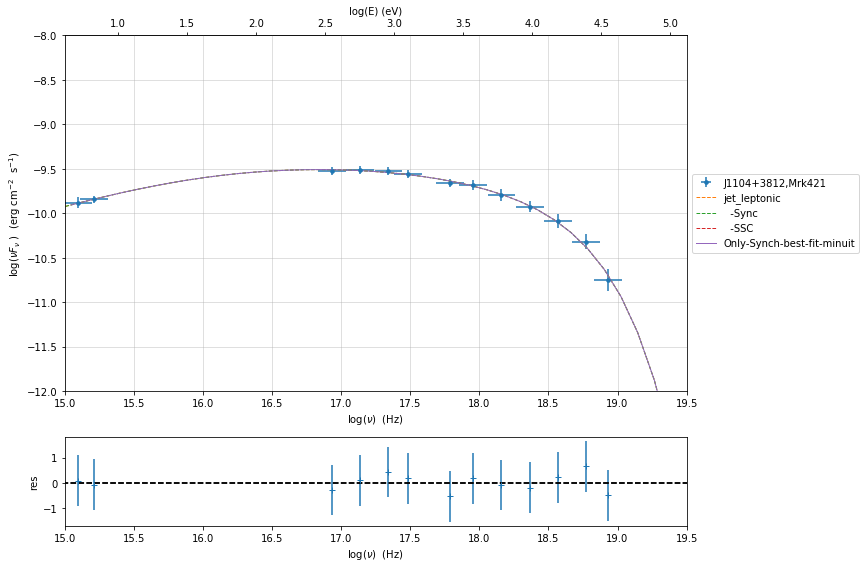

In [27]:
%matplotlib inline
fit_model_minuit.set_nu_grid(1E6,1E30,200)
fit_model_minuit.eval()
p2=fit_model_minuit.plot_model(sed_data=sed_data)
p2.rescale(y_min=-12,x_min=15,x_max=19.5)

In [28]:
model_minimizer_minuit.minimizer.mesg

------------------------------------------------------------------
| FCN = 1.412                   |     Ncalls=637 (648 total)     |
| EDM = 4.21E+06 (Goal: 1E-05)  |            up = 1.0            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     False     |     True      |   True    |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   False   |  True  |
------------------------------------------------------------------
-------------------------------------------------------------------------------------------
|   | Name  |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
-------------------------------------------------------------------------------------------
| 0 | par_0 |    330    |    100    |            |            |    1    |  1e+09  |       |
| 1 | par_1 |    8.7    |    2.7    |            |            |    0    |         |       |
| 2 | par_2 |   2.07    |   0.06    |            |            |   -10   |   10    |       |
| 3 | par_3 |   0.59    |   0.07    |            |            |   -15   |   15    |       |
| 4 | par_4 |   2.5E4   |   0.5E4   |            |            |    1    |  1e+09  |       |
| 5 | par_5 |   0.038   |   0.004   |            |            |    0    |         |       |
| 6 | par_6 |   25.5    |    1.9    |            |            |    5    |   50    |       |
-------------------------------------------------------------------------------------------

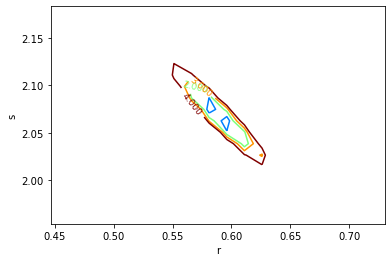

In [29]:
c=model_minimizer_minuit.minimizer.draw_contour('r','s')

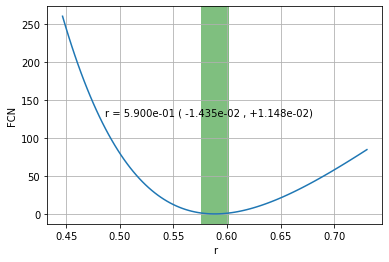

In [30]:
m=model_minimizer_minuit.minimizer.draw_profile('r')

In [31]:
best_fit_minuit.save_report('SSC-best-fit-minuit.txt')
model_minimizer_minuit.save_model('model_minimizer_minuit.pkl')
fit_model_minuit.save_model('fit_model_minuit.pkl')

## MCMC sampling

In [32]:
from jetset.mcmc import McmcSampler
from jetset.minimizer import ModelMinimizer


In [33]:
model_minimizer_minuit = ModelMinimizer.load_model('model_minimizer_minuit.pkl')

mcmc=McmcSampler(model_minimizer_minuit)

labels=['N','B','beam_obj','s','gamma0_log_parab']
model_name='jet_leptonic'
use_labels_dict={model_name:labels}

mcmc.run_sampler(nwalkers=128,burnin=10,steps=50,bound=5.0,bound_rel=True,threads=None,walker_start_bound=0.005,use_labels_dict=use_labels_dict)

mcmc run starting


100%|██████████| 50/50 [04:35<00:00,  5.51s/it]

mcmc run done, with 1 threads took 280.90 seconds


In [34]:
print(mcmc.acceptance_fraction)

0.54203125


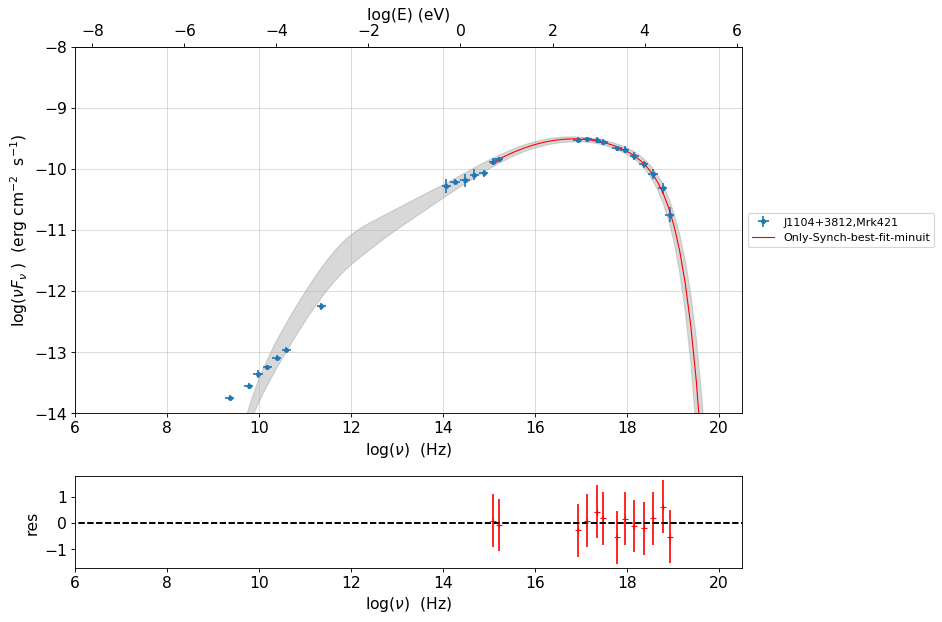

In [83]:
p=mcmc.plot_model(sed_data=sed_data,fit_range=[15., 20.],size=50)
p.rescale(y_min=-14,x_min=6,x_max=20.5)

f=mcmc.plot_chain('s',log_plot=False)

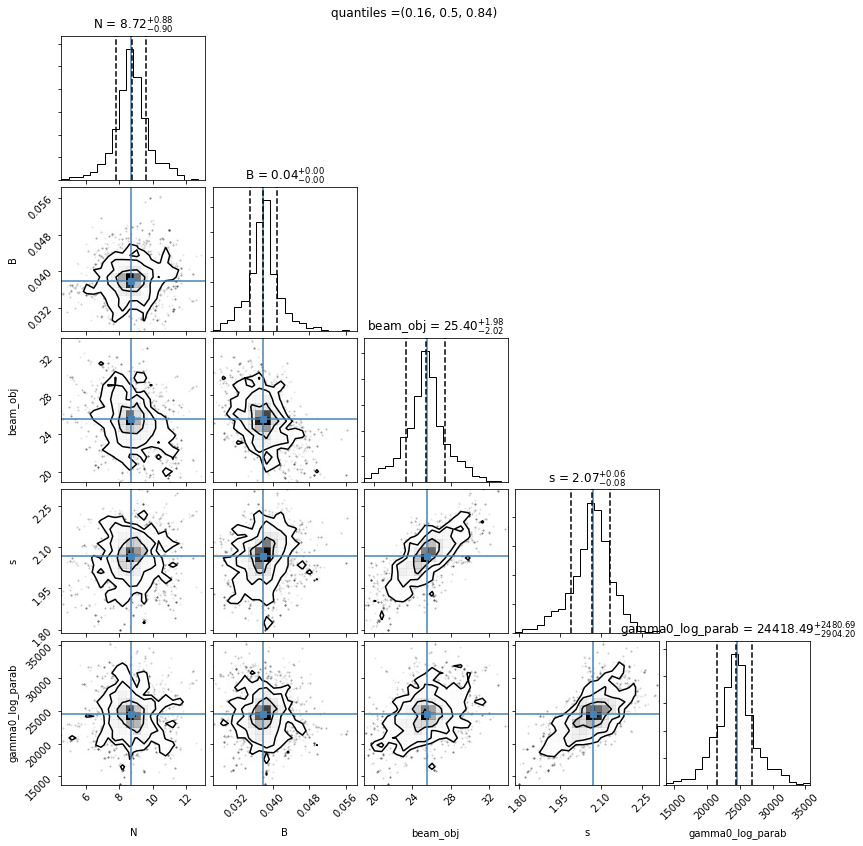

In [38]:
f=mcmc.corner_plot()

In [39]:
mcmc.get_par('N')

(array([8.78749157, 8.35789674, 8.48196193, ..., 9.53449644, 8.0998458 ,
        6.30523894]),
 0)

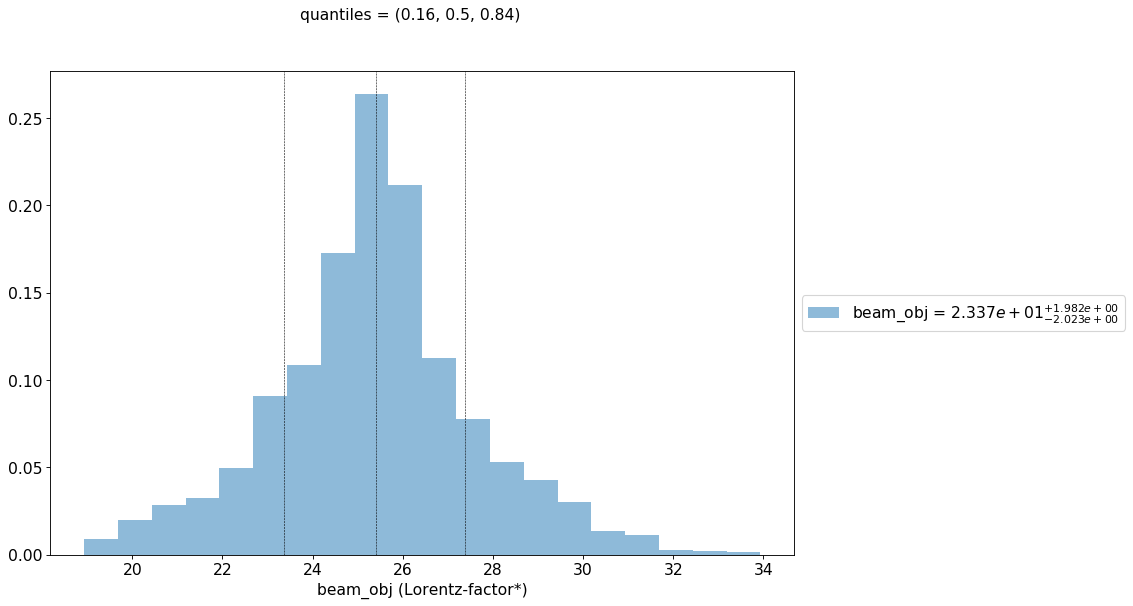

In [40]:
f=mcmc.plot_par('beam_obj')

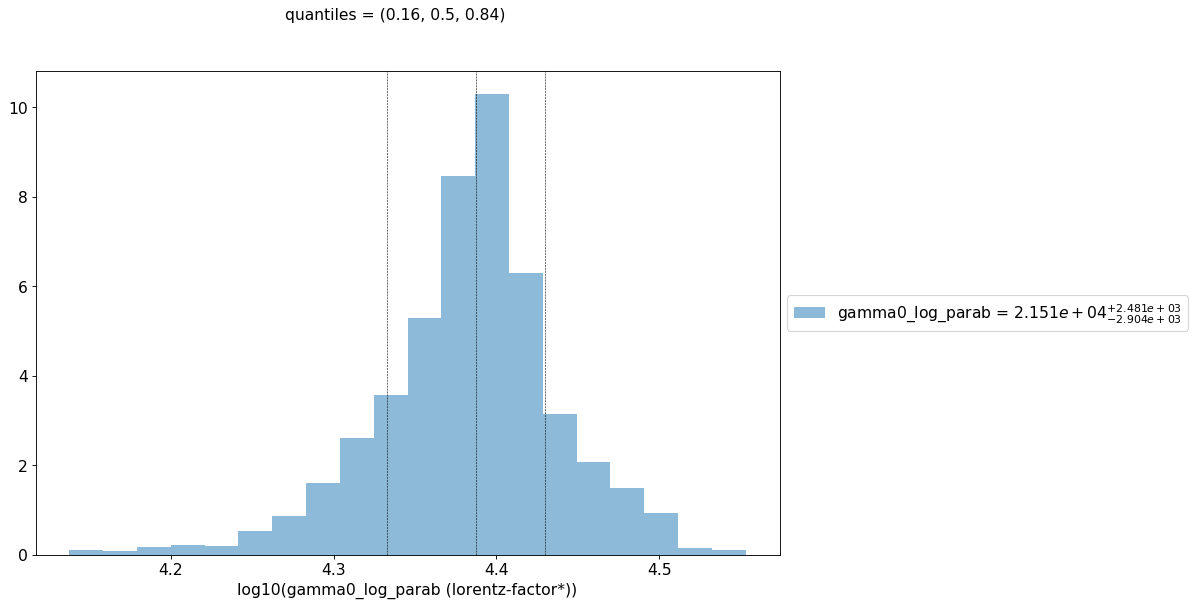

In [41]:
f=mcmc.plot_par('gamma0_log_parab',log_plot=True)

In [69]:
mcmc.save('mcmc_sampler.pkl')

In [70]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pylab as plt
import jetset
from jetset.test_data_helper import  test_SEDs
from jetset.data_loader import ObsData,Data
from jetset.plot_sedfit import PlotSED
from jetset.test_data_helper import  test_SEDs
print(test_SEDs[1])
data=Data.from_file(test_SEDs[1])
sed_data=ObsData(data_table=data)
sed_data.group_data(bin_width=0.2)

sed_data.add_systematics(0.1,[10.**6,10.**29])
#p=sed_data.plot_sed()

from jetset.mcmc import McmcSampler
from jetset.minimizer import ModelMinimizer



ms=McmcSampler.load('mcmc_sampler.pkl')

/Users/orion/anaconda3/envs/jetset/lib/python3.7/site-packages/jetset-1.1.2-py3.7-macosx-10.9-x86_64.egg/jetset/test_data/SEDs_data/SED_MW_Mrk421_EBL_DEABS.ecsv

***  binning data  ***
---> N bins= 89
---> bin_widht= 0.2



In [71]:
ms.model.name

'Only-Synch-best-fit-minuit'

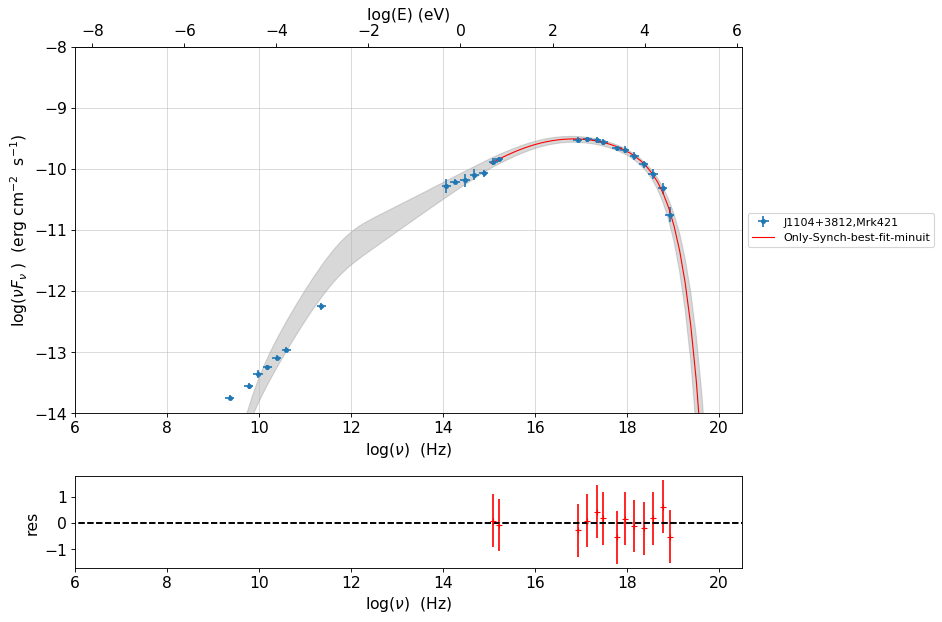

In [82]:
p=ms.plot_model(sed_data=sed_data,fit_range=[15., 20.],size=50)
p.rescale(y_min=-14,x_min=6,x_max=20.5)

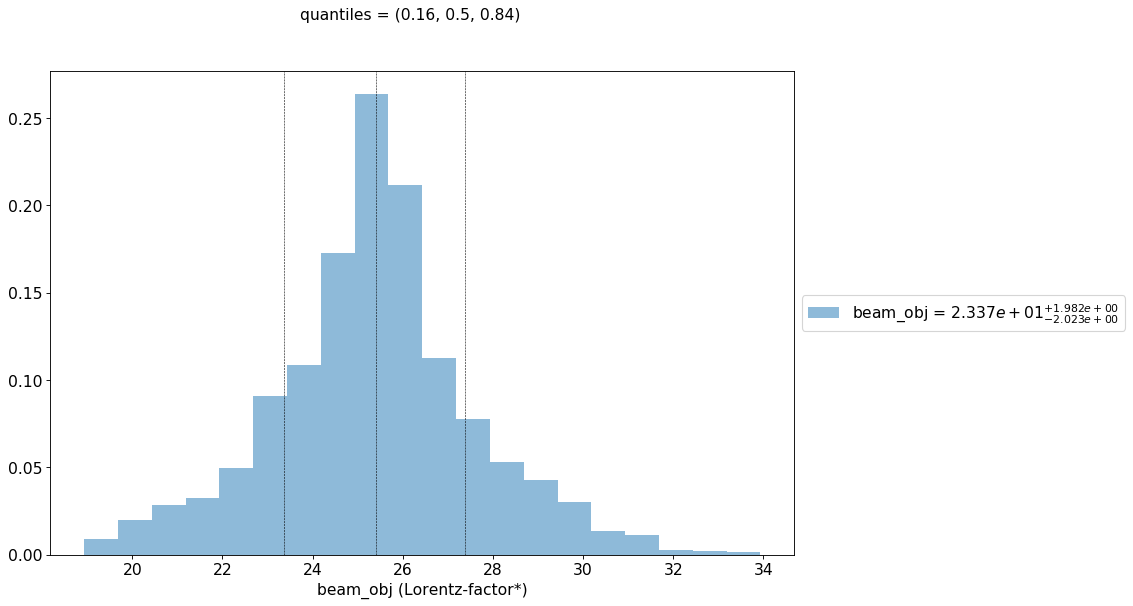

In [73]:
f=ms.plot_par('beam_obj',log_plot=False)


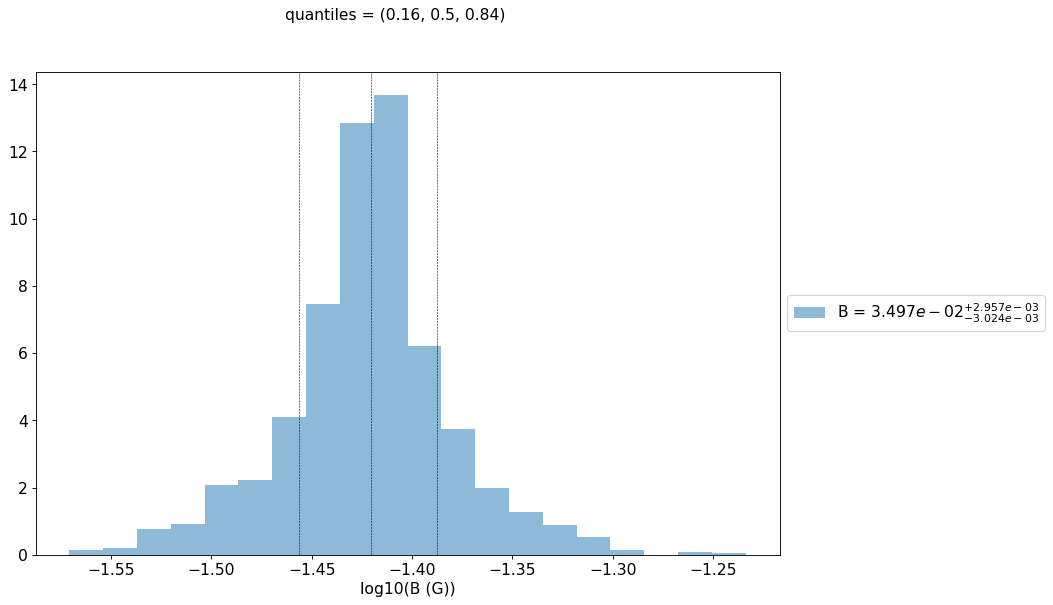

In [74]:
f=ms.plot_par('B',log_plot=True)


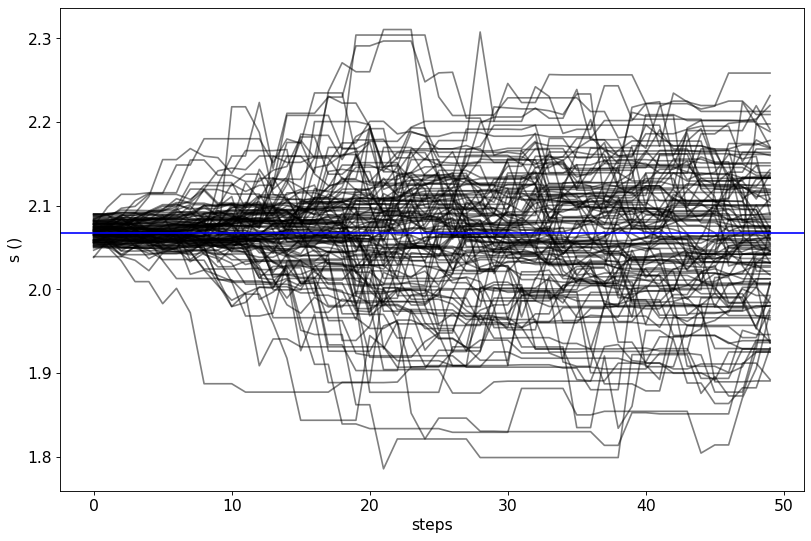

In [75]:
f=mcmc.plot_chain('s',log_plot=False)

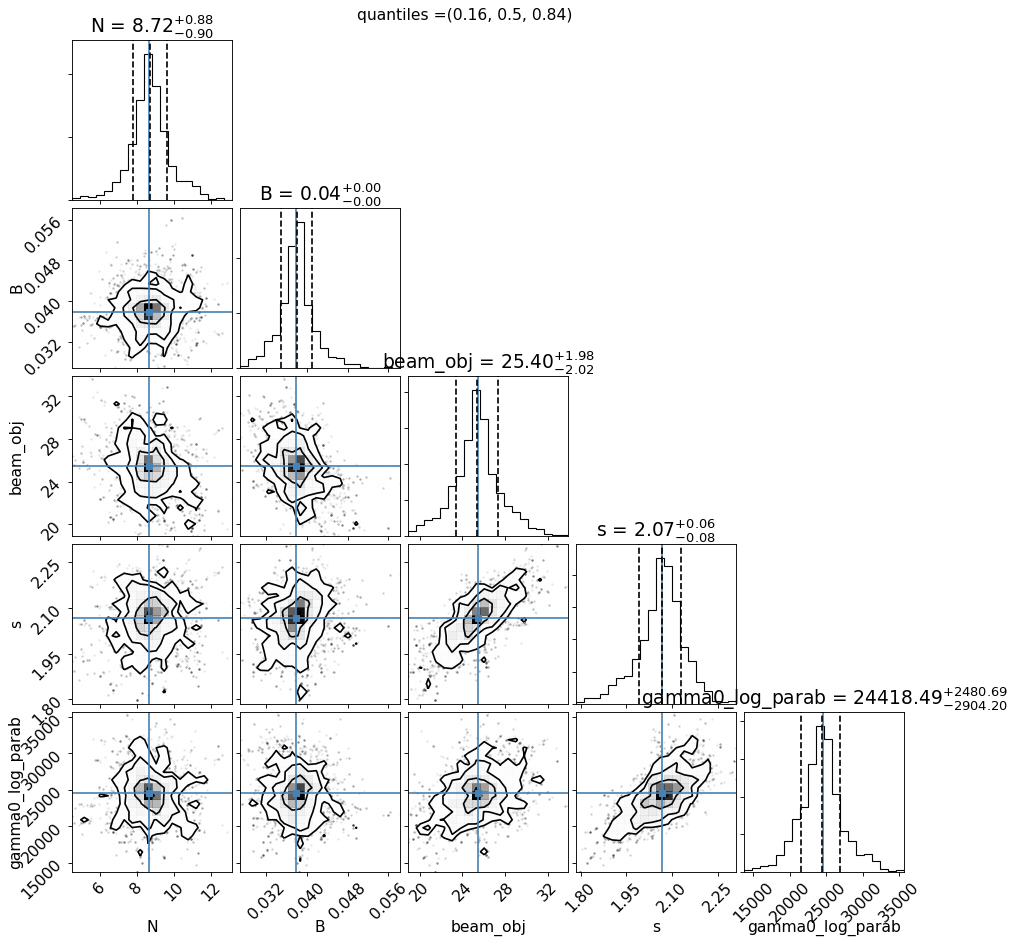

In [76]:
f=mcmc.corner_plot()